# Problem DESCRIPTION

One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

#Dataset Description

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

Store - the store number

Date - the week of sales

Weekly_Sales -  sales for the given store

Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

Temperature - Temperature on the day of sale

Fuel_Price - Cost of fuel in the region

CPI – Prevailing consumer price index

Unemployment - Prevailing unemployment rate

Holiday Events

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

Analysis Tasks

Basic Statistics tasks

Which store has maximum sales

Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

Which store/s has good quarterly growth rate in Q3’2012

Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

Provide a monthly and semester view of sales in units and give insights

Statistical Model

For Store 1 – Build  prediction models to forecast demand

Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

Change dates into days by creating new variable.

Select the model which gives best accuracy. 

In [2]:

# Import necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import dates
from datetime import datetime

read csv data

In [3]:
df = pd.read_csv('Walmart_Store_sales.csv')

In [4]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [5]:
df['Date'] =  pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


store has max sale is =  20


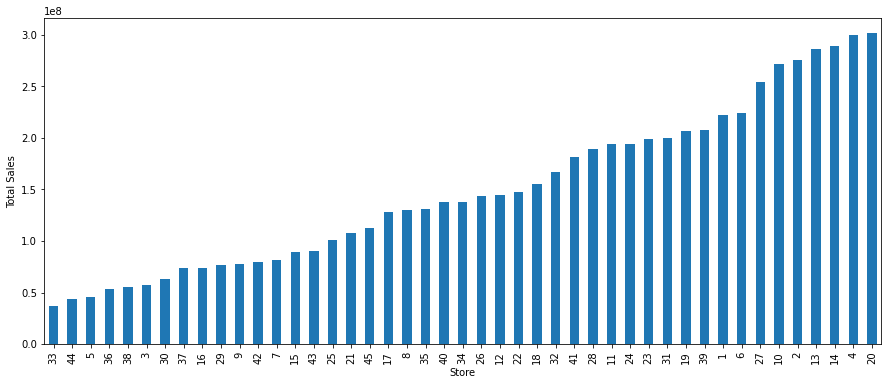

In [31]:
weekly_sale = df.groupby('Store')['Weekly_Sales'].sum().sort_values() 
plt.figure(figsize=(15,6))
plt.xlabel('Store')
plt.ylabel('Total Sales');
ax = weekly_sale.plot(kind='bar');
print('store has max sale is = ' ,weekly_sale.idxmax())

In [ ]:
#CALUCALATE STANDERD DIVIATION
DF_std =   pd.DataFrame(df.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False))
print("store having max Std diviation ",DF_std[0:1])
#DF_std[:1]

In [7]:
# Coefficient of mean to standard deviation
coef_mean_std = pd.DataFrame(df.groupby('Store')['Weekly_Sales'].std() / df.groupby('Store')['Weekly_Sales'].mean())
coef_mean_std = coef_mean_std.rename(columns={'Weekly_Sales':'Coefficient of mean to standard deviation'})
coef_mean_std


,Coefficient of mean to standard deviation
Store,
1,0.100292
2,0.123424
3,0.115021
4,0.127083
5,0.118668
6,0.135823
7,0.197305
8,0.116953
9,0.126895


Store which has max profit  4 th store with  25652119.35 $


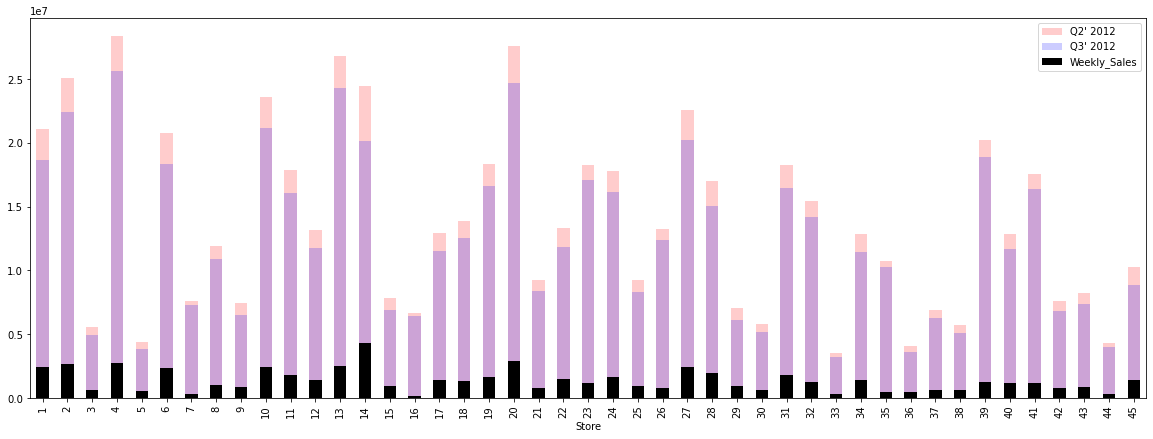

In [8]:
#Which store/s has good quarterly growth rate in Q3’2012
Q3 = df[ ((df['Date'] > '2012-7-1') &  (df['Date'] < '2012-9-30')) ].groupby('Store')['Weekly_Sales'].sum()

plt.figure(figsize=(20,7))
# Sales for 2nd quarterly in 2012
Q2 = df[(df['Date'] > '2012-04-01') & (df['Date'] < '2012-06-30')].groupby('Store')['Weekly_Sales'].sum()
#plt.plot(Q2,label = "Q2",C='b')
#plt.plot(Q3 ,label = "Q3",C='r')
#plt.legend()


Q2.plot(kind ='bar',color='r',alpha=0.2,legend=True)
Q3.plot(kind ='bar',color='b',alpha=0.2,legend=True)
plt.legend(["Q2' 2012", "Q3' 2012"]);

diffrence = Q2 - Q3
diffrence.plot(kind ='bar',color='k',legend=True)
print("Store which has max profit ",Q3.idxmax(),'th store with ' ,Q3.max(),'$')


mean is 47113419.490279734


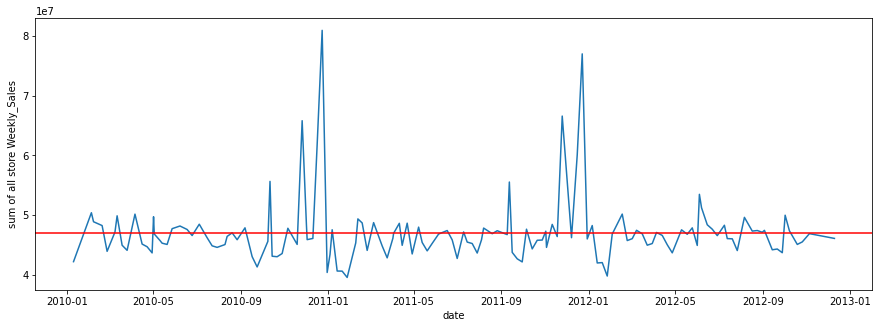

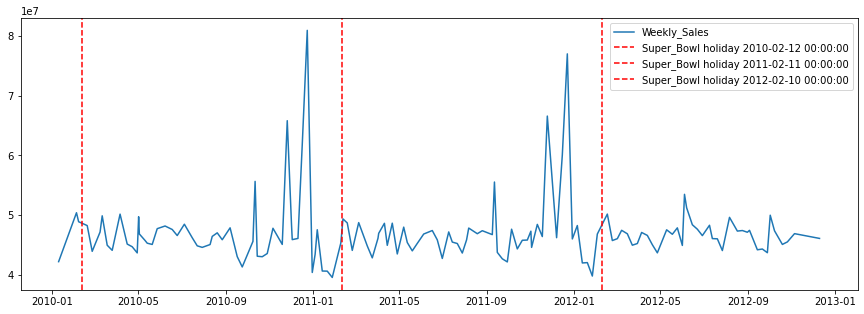

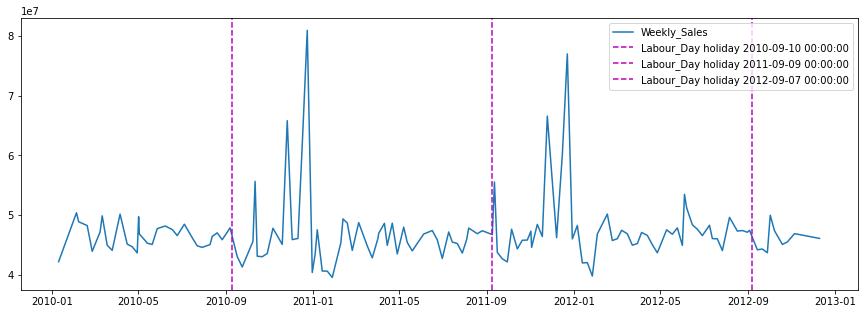

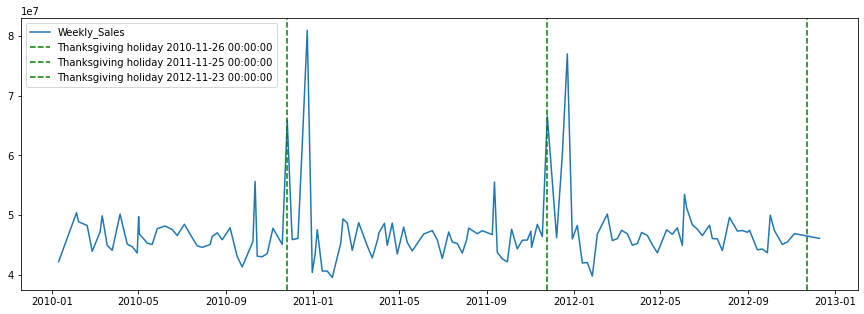

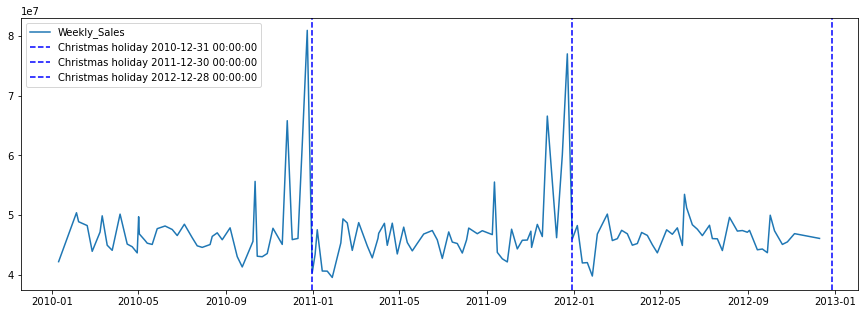

as per above chart we can see Thanksgiving day have more sale then other holiday 


In [9]:
#Some holidays have a negative impact on sales. 
#Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together
plt.figure(figsize=(15,5))
sale_by_date = df.groupby('Date')['Weekly_Sales'].sum()
sale_mean_by_date = sale_by_date.mean()
print('mean is',sale_mean_by_date)
plt.plot(sale_by_date)
plt.axhline(sale_mean_by_date,color = 'r', linestyle = '-')
plt.xlabel("date")
plt.ylabel("sum of all store Weekly_Sales")

Super_Bowl =['12-2-2010', '11-2-2011', '10-2-2012']
Labour_Day =  ['10-9-2010', '9-9-2011', '7-9-2012']
Thanksgiving =  ['26-11-2010', '25-11-2011', '23-11-2012']
Christmas = ['31-12-2010', '30-12-2011', '28-12-2012']
#plt.axvline('31-12-2010')

fig, ax = plt.subplots(figsize = (15,5))  
ax.plot(sale_by_date,label='Weekly_Sales')
for day in Super_Bowl:
    day = datetime.strptime(day, '%d-%m-%Y')
    plt.axvline(x=day, label='Super_Bowl holiday %s'%day,linestyle='--', c='r')
ax.legend() 
plt.show()

fig, ax = plt.subplots(figsize = (15,5))  
ax.plot(sale_by_date,label='Weekly_Sales')
for day in Labour_Day:
    day = datetime.strptime(day, '%d-%m-%Y')
    plt.axvline(x=day,label='Labour_Day holiday %s'%day, linestyle='--', c='m')
    
ax.legend() 
plt.show()    

fig, ax = plt.subplots(figsize = (15,5))  
ax.plot(sale_by_date,label='Weekly_Sales')
for day in Thanksgiving:
    day = datetime.strptime(day, '%d-%m-%Y')
    plt.axvline(x=day, label='Thanksgiving holiday %s'%day,linestyle='--', c='g')
ax.legend() 
plt.show()    
    
fig, ax = plt.subplots(figsize = (15,5))  
ax.plot(sale_by_date,label='Weekly_Sales')
for day in Christmas:
    day = datetime.strptime(day, '%d-%m-%Y')
    plt.axvline(x=day,label='Christmas holiday %s'%day, linestyle='--', c='b')
    
ax.legend()
    
plt.show()
print("as per above chart we can see Thanksgiving day have more sale then other holiday ")

In [10]:
import calendar
df['year']= df['Date'].dt.year
df['month']= df['Date'].dt.month
df['day']= df['Date'].dt.day
df['MonthName']= df['month'].apply(lambda x: calendar.month_name[x])
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,MonthName
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,May
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,December
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,February
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,February
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,May


In [15]:
#New DataSet for 2012 Data.
SaleData2012 = df[df['year']==2012]
SaleData2010 = df[df['year']==2010]
SaleData2011 = df[df['year']==2011]

Text(0.5, 1.0, 'yearly sale report ')

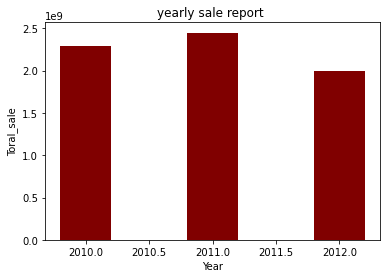

In [16]:
##Task5: Provide a monthly and semester view of sales in units and give insights
#Monthly Sale of all store
MonthlySale = df.groupby("MonthName")["Weekly_Sales"].sum().reset_index(name="Total_Sale").sort_values(by='Total_Sale', ascending=False)
MonthlySale['Total_Sale']=MonthlySale['Total_Sale'].round(2)
yearly_sale =df.groupby('year')['Weekly_Sales'].sum().reset_index(name='Toral_sale')
plt.bar(yearly_sale['year'],yearly_sale['Toral_sale'],color ='maroon',width = 0.4)
plt.ylabel("Toral_sale")
plt.xlabel("Year")
plt.title("yearly sale report ")

Text(0.5, 1.0, 'yearly sale report ')

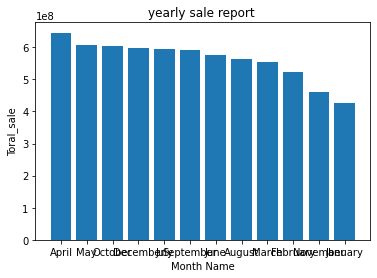

In [17]:
plt.bar(MonthlySale['MonthName'],MonthlySale['Total_Sale'])
plt.ylabel("Toral_sale")
plt.xlabel("Month Name")
plt.title("yearly sale report ")

In [18]:
SaleData2012[SaleData2012['month'] == 5]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,MonthName
119,1,2012-05-18,1595901.87,0,70.33,3.630,221.742674,7.143,2012,5,18,May
120,1,2012-05-25,1555444.55,0,77.22,3.561,221.744944,7.143,2012,5,25,May
139,1,2012-05-10,1670785.97,0,68.55,3.617,223.181477,6.573,2012,5,10,May
262,2,2012-05-18,2000940.67,0,71.27,3.630,221.380331,6.891,2012,5,18,May
263,2,2012-05-25,1912791.09,0,78.19,3.561,221.382803,6.891,2012,5,25,May
...,...,...,...,...,...,...,...,...,...,...,...,...
6269,44,2012-05-25,343268.29,0,62.39,3.801,131.028774,5.621,2012,5,25,May
6288,44,2012-05-10,337390.44,0,61.79,3.815,131.075667,5.217,2012,5,10,May
6411,45,2012-05-18,800842.28,0,66.30,3.848,190.996448,8.567,2012,5,18,May
6412,45,2012-05-25,817741.17,0,67.21,3.798,191.002810,8.567,2012,5,25,May


<BarContainer object of 6 artists>

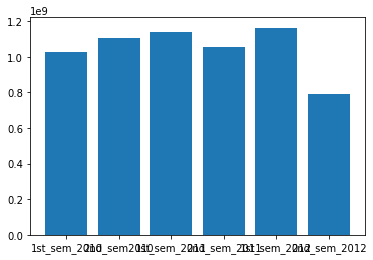

In [19]:
sem_data =[0,0,0,0,0,0]
sem_data_info =["1st_sem_2010","2nd_sem2010","1st_sem_2011","2nd_sem_2011","1st_sem_2012","2nd_sem_2012"]
def semister_sale_cal(datafram):
    sem_1st = datafram[(datafram['month'] == 1)|(datafram['month'] == 2)|(datafram['month'] == 3)|(datafram['month'] == 4)|(datafram['month'] == 5)|(datafram['month'] == 6)]
    sem_2nd = datafram[(datafram['month'] == 7)|(datafram['month'] == 8)|(datafram['month'] == 9)|(datafram['month'] == 10)|(datafram['month'] == 10)|(datafram['month'] == 12)]
    sem_1st_sum  = sem_1st["Weekly_Sales"].sum()
    sem_2nd_sum  = sem_2nd["Weekly_Sales"].sum()
    return sem_1st_sum,sem_2nd_sum

sem_data[0],sem_data[1] = semister_sale_cal(SaleData2010)
sem_data[2],sem_data[3] = semister_sale_cal(SaleData2011)
sem_data[4],sem_data[5] =semister_sale_cal(SaleData2012)

sem_data
plt.bar(sem_data_info,sem_data)

# Statistical Model
For Store 1 – Build prediction models to forecast demand
Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

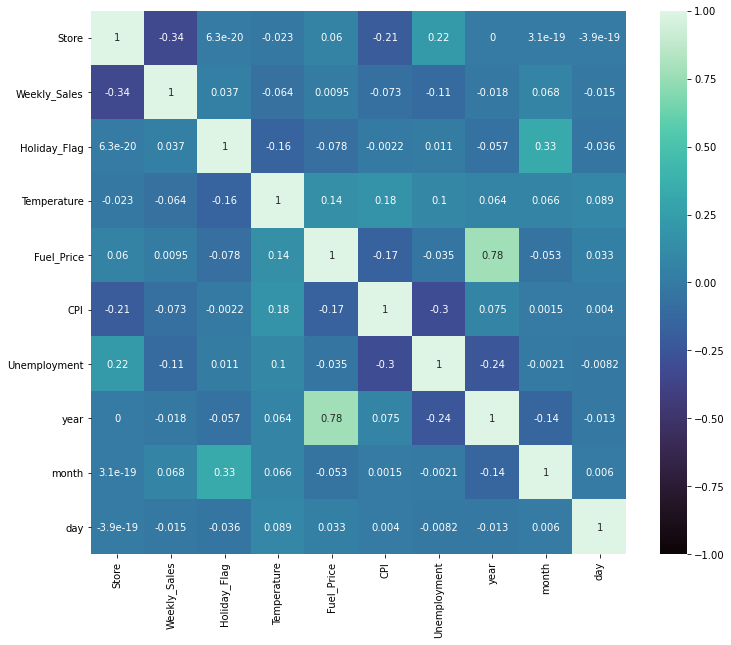

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,year,month,day,MonthName
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,2010,5,2,May
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,2010,12,2,December
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2,19,February
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2,26,February
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,2010,5,3,May
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,2012,9,28,September
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,2012,5,10,May
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,2012,12,10,December
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,2012,10,19,October


In [20]:
import seaborn as sns
corr = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.show()
df

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

#df['Store'] = df.Store.astype(str)
#df['Store'] = 'Store '+ df.Store.astype(str)
LabEncoder = LabelEncoder()
Str_1 = df[df['Store']==1]
#Str_1 = Str_1.copy()
Str_1['Days'] = LabEncoder.fit_transform(Str_1['Date'])
Str_1.drop(['Store','Date','Holiday_Flag','year','month','day','MonthName'],axis=1 , inplace = True)
Str_1

<ipython-input-21-0cccb16da133>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Str_1['Days'] = LabEncoder.fit_transform(Str_1['Date'])
/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Days
0,1643690.90,42.31,2.572,211.096358,8.106,13
1,1641957.44,38.51,2.548,211.242170,8.106,42
2,1611968.17,39.93,2.514,211.289143,8.106,3
3,1409727.59,46.63,2.561,211.319643,8.106,4
4,1554806.68,46.50,2.625,211.350143,8.106,14
...,...,...,...,...,...,...
138,1437059.26,76.08,3.666,222.981658,6.908,136
139,1670785.97,68.55,3.617,223.181477,6.573,116
140,1573072.81,62.99,3.601,223.381296,6.573,142
141,1508068.77,67.97,3.594,223.425723,6.573,139


<AxesSubplot:>

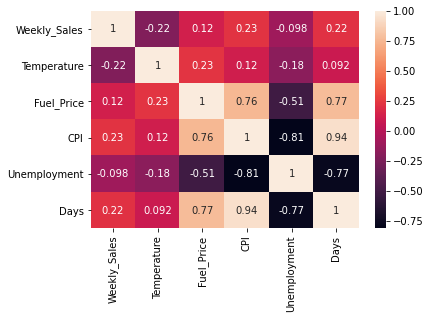

In [22]:
corr = Str_1.corr()
corrmat = sns.heatmap(Str_1.corr(), annot=True)
corrmat

In [23]:
X = Str_1[['Days','Fuel_Price','CPI','Unemployment']]
y = Str_1['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20)
Linreg = LinearRegression()
Linreg.fit(X_train,y_train)
y_pred = Linreg.predict(X_test)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 138501.65320946564
Mean Squared Error: 46102528603.08875
Root Mean Squared Error: 214714.9938944385


In [24]:
Actual_vs_Pred = pd.DataFrame({"Actual Sales" : y_test, "Predicted Sales": y_pred})
Actual_vs_Pred

,Actual Sales,Predicted Sales
15,1399662.07,1.465963e+06
106,1819870.00,1.606587e+06
23,1448938.92,1.500930e+06
49,1391013.96,1.475313e+06
78,1624383.75,1.554007e+06
103,1319325.59,1.621314e+06
111,1511068.07,1.600549e+06
9,1545418.53,1.479364e+06
85,1380020.27,1.610634e+06
55,1456800.28,1.524052e+06


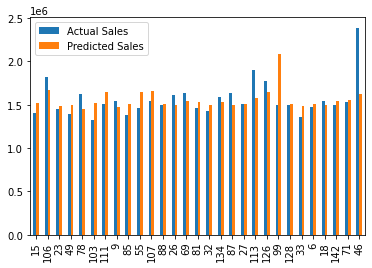

In [28]:
ax = Actual_vs_Pred.plot(kind='bar');

In [25]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 400,max_depth=15)        
rfr.fit(X_train,y_train)
y_pred=rfr.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
Actual_vs_Pred = pd.DataFrame({"Actual Sales" : y_test, "Predicted Sales": y_pred})
Actual_vs_Pred

Mean Absolute Error: 139018.05526817447
Mean Squared Error: 45827239805.88807
Root Mean Squared Error: 214072.97775732478


,Actual Sales,Predicted Sales
15,1399662.07,1.514207e+06
106,1819870.00,1.673145e+06
23,1448938.92,1.481685e+06
49,1391013.96,1.497532e+06
78,1624383.75,1.444481e+06
103,1319325.59,1.521986e+06
111,1511068.07,1.645811e+06
9,1545418.53,1.472994e+06
85,1380020.27,1.507608e+06
55,1456800.28,1.642667e+06


<Figure size 14400x360 with 0 Axes>

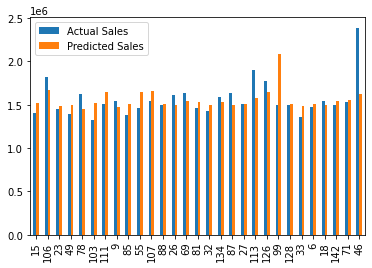

In [47]:
plt.figure(figsize=(200,5))
ax = Actual_vs_Pred.plot(kind='bar');
